Task 7

In [5]:
import numpy as np
import pymc as pm
import arviz as az
from enum import Enum

class DistributionType(Enum):
  BERNOULLI = 0,
  BINOMIAL = 1

def drug_survey(n_yes: int, distribution: DistributionType) -> None:
  # Occurences for bernoulli
  zeros = np.zeros(100 - n_yes)
  ones = np.ones(n_yes)
  occurences = np.concatenate((zeros, ones))
  with pm.Model() as model:
    p_d = pm.Uniform('p_d', 0, 1)
    p_observed = pm.Deterministic('p_observed', 0.25+0.5*p_d)
    if distribution == DistributionType.BERNOULLI:
      bernoulli_answers = pm.Bernoulli('bernoulli_answers', p_observed, observed=occurences)
    else:
      binomial_answers = pm.Binomial('binomial_answers', 100, p_observed, observed=n_yes)

    # Perform MCMC sampling
    trace = pm.sample(1000, tune=1000)

  # Visualize the results
  az.plot_trace(trace)
  summary = az.summary(trace, round_to=2)
  az.plot_posterior(trace)
  print(summary)

Above we can see the reproduced example from lecture, the model which will examine the drug survey case.
--

Model Explanation:
--
The model is attempting to estimate the probability p_d that a randomly chosen person from the survey group is taking drugs.
p_observed is the observed probability of answering "yes" to the drug question. According to the provided survey instructions, this is a combination of:
A 25% chance that the participant says "yes" because the first coin toss is heads and the second coin toss is heads, and a 50% chance that the participant says "yes" honestly because they are taking drugs (based on their own answer).
The model uses the observed data (number of "yes" responses out of 100) and the assumed relationship between p_d and p_observed to estimate p_d.

Let's look on the following examples, starting from example a with 20 answers yes

/usr/local/lib/python3.10/dist-packages/arviz/utils.py:184: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  numba_fn = numba.jit(**self.kwargs)(self.function)
/usr/local/lib/python3.10/dist-packages/arviz/utils.py:184: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  numba_fn = numba.jit(**self.kwargs)(self.function)


            mean    sd  hdi_3%  hdi_97%  mcse_mean  mcse_sd  ess_bulk  \
p_d         0.05  0.04    0.00     0.12        0.0      0.0    522.87   
p_observed  0.27  0.02    0.25     0.31        0.0      0.0    522.87   

            ess_tail  r_hat  
p_d           367.95    1.0  
p_observed    367.95    1.0  


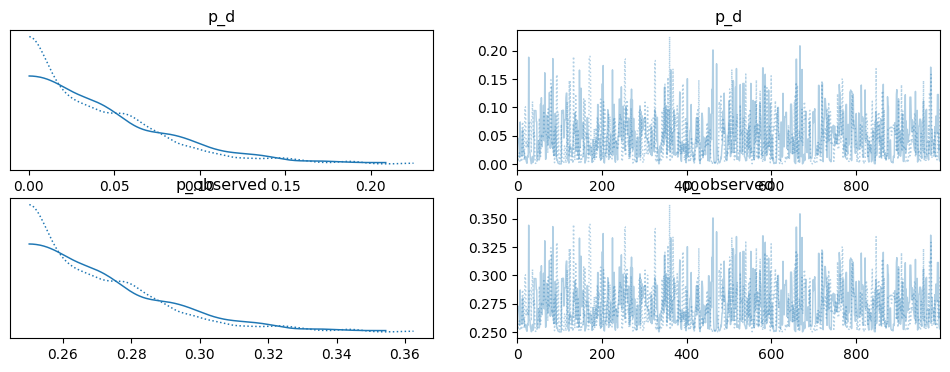

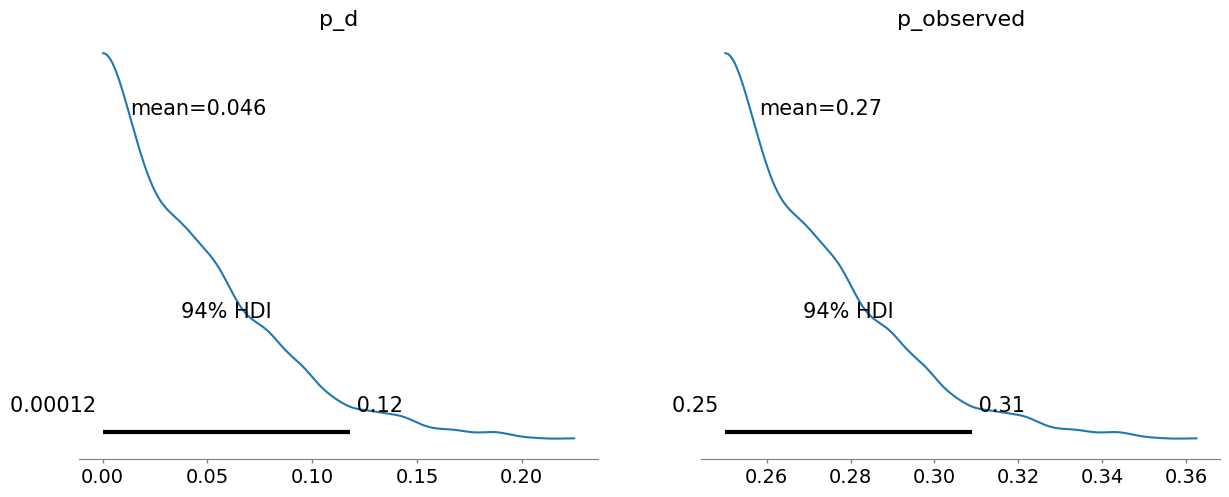

In [2]:
drug_survey(20, DistributionType.BERNOULLI)

p_d (mean = 0.05) is the estimated probability that a person is taking drugs. The credible interval (0.00, 0.12) is wider, indicating some uncertainty in the estimate.
p_observed (mean = 0.27) is the estimated probability of a "yes" answer to the survey question. This is close to the expected value (0.25 + 0.5 * p_d) based on the model and given p_d = 0.05.

Now let's look on the example b where there is 10 answers yes

            mean    sd  hdi_3%  hdi_97%  mcse_mean  mcse_sd  ess_bulk  \
p_d         0.02  0.02    0.00     0.07        0.0      0.0     532.0   
p_observed  0.26  0.01    0.25     0.28        0.0      0.0     532.0   

            ess_tail  r_hat  
p_d           462.17    1.0  
p_observed    462.17    1.0  


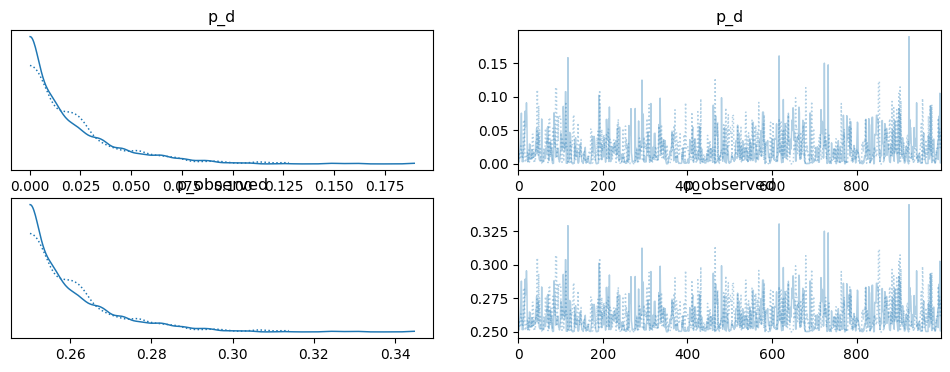

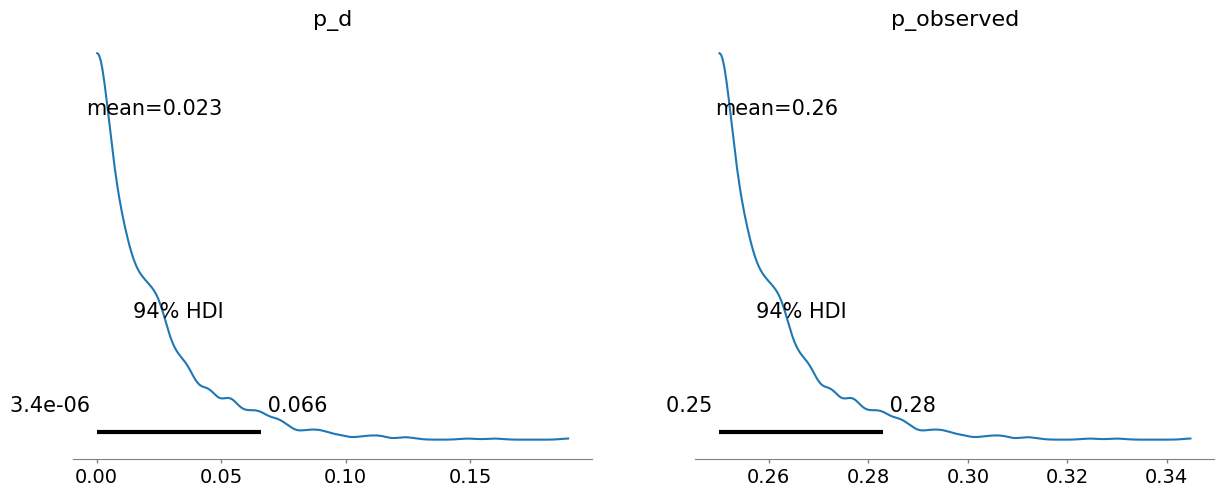

In [3]:
drug_survey(10, DistributionType.BERNOULLI)

p_d (mean = 0.02) is lower than the previous case, suggesting a lower probability of a person taking drugs in this group.
The credible interval (0.00, 0.07) is smaller than before, showing more precision in the estimate.

            mean    sd  hdi_3%  hdi_97%  mcse_mean  mcse_sd  ess_bulk  \
p_d         0.02  0.02    0.00     0.05        0.0      0.0    594.67   
p_observed  0.26  0.01    0.25     0.27        0.0      0.0    594.67   

            ess_tail  r_hat  
p_d           362.46    1.0  
p_observed    362.46    1.0  


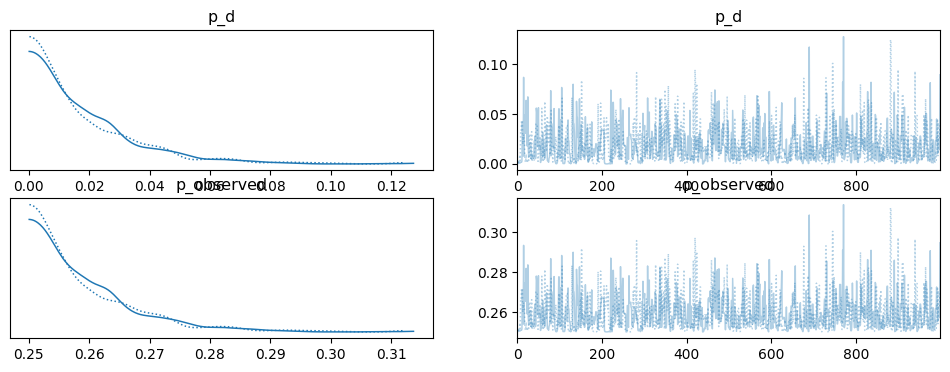

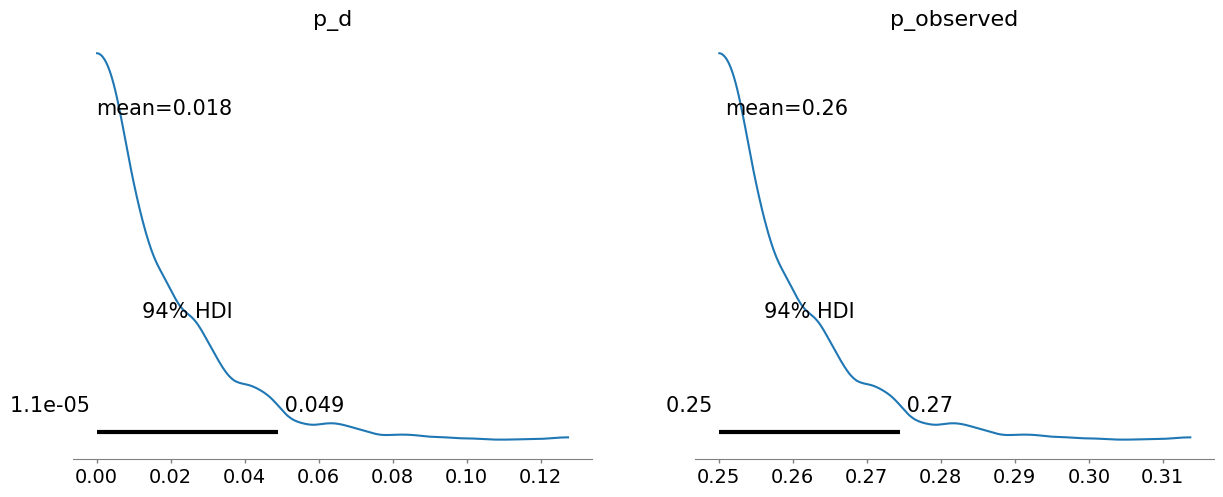

In [4]:
drug_survey(5, DistributionType.BERNOULLI)

p_d (mean = 0.02) remains low, as the number of "yes" responses is even lower, suggesting a very low probability of a person taking drugs.
The credible interval (0.00, 0.05) is even smaller, indicating a more precise estimate of p_d.

----
Summary:
--
As the number of "yes" responses decreases from 20 to 10 to 5, the estimated probability p_d of a person taking drugs also decreases. The credible intervals for p_d become narrower as the number of "yes" responses decreases, suggesting greater precision in the estimates.

In each case, p_observed is close to its expected value based on the model (0.25 + 0.5 * p_d). The results illustrate how the model adjusts its estimation of p_d based on the observed data, reflecting the likelihood of a person taking drugs under the constraints of the survey methodology.